# WEEK 10 - Clustering 1 - k-means; specifically elbow method, Silhouette score, feature scaling, and distance metrics. 

In [1]:
!pip install statsmodels


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels.api as sm
import networkx as nx

In [2]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
#1
df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")

#2
df_pima = pd.read_csv("pima_indian_diabetes_dataset.csv") 

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# DATASET 2

NOTES

- Class balancing is not needed here because clustering is unsupervised
- The Outcome column is not used except for interpretation.

In [5]:
# Separate features from target
X = df_pima.drop(columns=['Outcome'])
y = df_pima['Outcome']  # not used for clustering, only for later interpretation

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

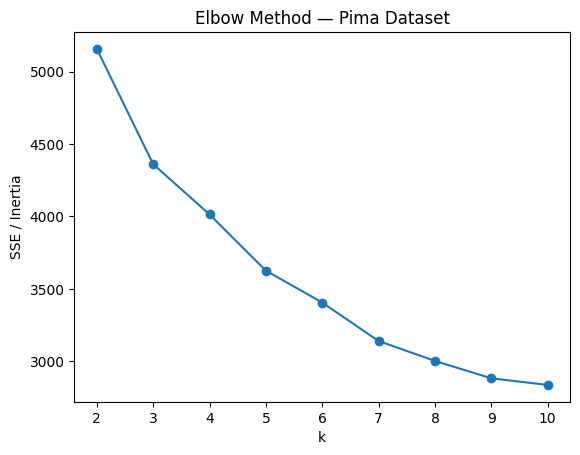

In [8]:
# Elbow method 

sse = []
K_range = range(2, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    sse.append(km.inertia_)

plt.plot(K_range, sse, marker='o')
plt.xlabel("k")
plt.ylabel("SSE / Inertia")
plt.title("Elbow Method — Pima Dataset")
plt.show()


Using the elbow method, we look for the place that the slope abruptly changes and goes from steep to shallow. This graph showes a noticeable bend at k = 3, suggesting diminishing returns beyond this point. This indicates that the optimal number of clusters for the Pima dataset is k = 3. This is interesting because the dataset only has two diagnostic groups, diabetes and no diabetes. But representative of a real popluation that has a prediabetes group.  

The elbow method indicated that the optimal number of clusters for the Pima dataset is approximately k = 3. At K = 3, the SSE curve transitions from a steep decline to a more gradual, linear decrease, indicating diminishing returns from adding additional clusters. 

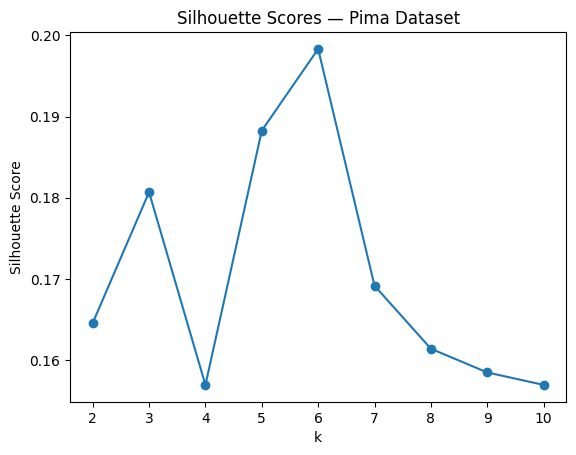

In [9]:
# silhouette score

sil_scores = []

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    sil_scores.append(sil)

plt.plot(K_range, sil_scores, marker='o')
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores — Pima Dataset")
plt.show()


The Silhouette score compares the inter-cluster distance (mean distance from one point to another point in the same cluster) vs. the intra cluster distance (neab distance of a point to a point in another cluster). To calculate the Silhouette score, we substract the intracluster distance from the inter cluster distance, and divide by the maximum of the two. Usually the inter-cluster distance is larger. A high silhouette score means that the points in each group are more similar to one another than points in other groups. The Silhouette score is more computationally expensive than the elbow method. 

The graph shows that the highest Silhouette score is 6. The second highest Silhouette score is equal to 3, which aligns with the results from the elbow method. Overall all the scores are relatively low since Silouette scores range from 0 to 1, indicating the clusters are weakly separated. The difference between K=3 and k=6 is only 0.017. 



K = 3 seems like a more reasonable choice for this data, since the data context is that there are 2 diabetes groups indicated in the dataset, and 3 diabetes groups in the general population: pre, diab and no diab. 

Generally the elbow method provides more interpretable and meaningful clustesr. 

In [ ]:
# generate final clusters using k = 3

best_k = 3
km_final = KMeans(n_clusters=best_k, random_state=42)
df_pima['Cluster'] = km_final.fit_predict(X_scaled)

df_pima.groupby('Cluster').mean()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Cluster,,,,,,,,,
0,2.953052,141.544601,74.192488,34.779343,197.417840,36.972770,0.608216,31.769953,0.535211
1,7.276018,128.411765,76.859729,12.882353,27.678733,32.180090,0.437557,45.787330,0.488688
2,2.143713,102.751497,60.730539,16.517964,39.278443,28.692515,0.407638,25.877246,0.137725


In [11]:
# generate final clusters using k = 2

best_k = 2
km_final = KMeans(n_clusters=best_k, random_state=42)
df_pima['Cluster'] = km_final.fit_predict(X_scaled)

df_pima.groupby('Cluster').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Cluster,,,,,,,,,
0,4.101974,136.884868,75.046053,33.878289,160.838816,36.373684,0.573053,34.651316,0.513158
1,3.676724,110.418103,65.213362,11.795259,26.704741,29.122198,0.405588,32.316810,0.241379


I ran k-means clustering with k=3. 

Cluster 0 appears to represent a high diabetes risk group. This cluster has the highest average glucose (141.5), BMI (36.97), and insulin level (197). The DiabetesPedigreeFunction, an indication of genetic risk, is also the highest at 0.61. In the original dataset, the outcome column consists of 0 (no diabetes diagnosis) or 1 (diabetes diagnosis). In the summary table, the Outcome column mean is also the highest of the 3 groups at 0.54. This indicates that about 54% of the people in that cluster have a diabetes diagnosis. 

Overall the algorithm successfully grouped individuals with clear physiological markers of diabetes into separate groups. 

The outcome column 
 cluster also has the highest diabetes prevalence at 53.5%, indicating that the algorithm successfully grouped individuals with clear physiological markers of diabetes.

Since the dataset has two outcomes, I also ran clustering with k=2. 

Insert more discussion on distance metrics - find sources:

https://medium.com/aiskunks/the-significance-of-distance-and-similarity-measures-in-clustering-bc9ec9292082

https://www.geeksforgeeks.org/machine-learning/clustering-distance-measures/

used
https://www.geeksforgeeks.org/machine-learning/what-is-silhouette-score/
